In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data

 For this practice problem, we have been given two CSV files: train and test.

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.

Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

# Read Train and Test Data

In [189]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [190]:
train_original = train.copy()
test_original = test.copy()

# Understanding the Data

In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.

In [191]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

In [192]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model that we will build using the train data.

# Print the data types

In [193]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Shape of the dataset

In [194]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [195]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

# Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. 

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

# Target Variable

We will first look at the target variable, i.e., Loan_Status.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [196]:
#train["Loan_Status"].size
train["Loan_Status"].count()

614

Size of our target variable is : 614

In [197]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Among 614 Loan_Status :
Accepted : 422 
Rejected : 192

In [198]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

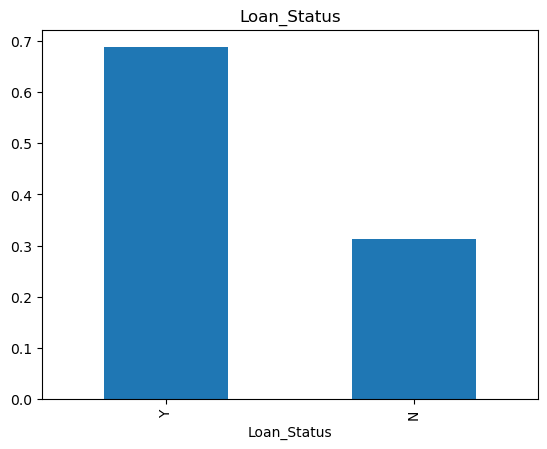

In [199]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

# Independent Variable (Categorical)

# Analysis on "Gender" variable :

In [200]:
train["Gender"].count()

601

Size of our "Gender" variable is : 614

In [201]:
train["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

Among 601 person: 
Male : 489 
Female : 112

In [202]:
train['Gender'].value_counts(normalize=True)*100

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

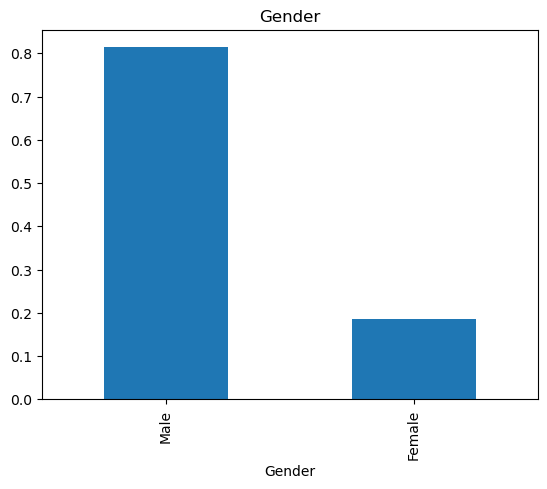

In [203]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In our train dataset the "Gender" variable contain
Male : 81%
Female: 19%     

# Analysis on "Married" variable :

In [204]:
train["Married"].count()

611

Size of our "Married" variable is : 611

In [205]:
train["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

Total number of people : 611

Married : 398

Unmarried : 213    

In [206]:
train['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

<Axes: title={'center': 'Married'}, xlabel='Married'>

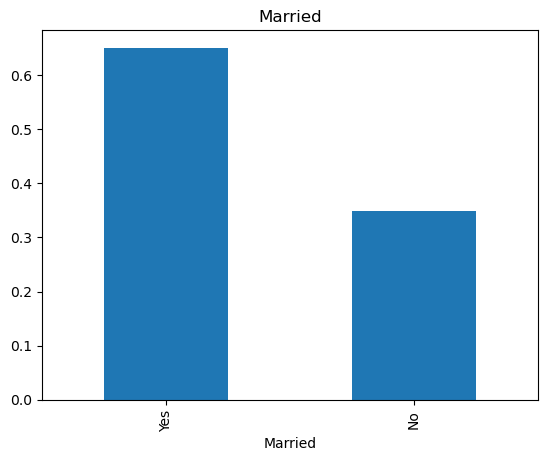

In [207]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

From the Grapch we see that :

Number of married people : 65%

Number of unmarried people : 35%    

# Analysis on "Self_Employed" variable : 

In [208]:
train["Self_Employed"].count()

582

Size of our "Self_Employed" variable is : 582

In [209]:
train["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Total number of people : 582

Self_Employed : 82

Not_Self_Employed : 500

In [210]:
train['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

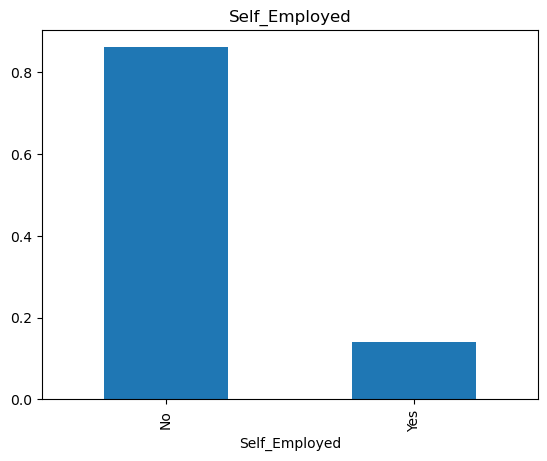

In [211]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

# Analysis on "Credit_History" variable :

In [212]:
train["Credit_History"].count()

564

Size of our "Credit_History" variable is : 564

In [213]:
train["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

Total number of debts : 564

Repaid Debts : 475

Not Repaid Debts : 89    

In [214]:
train['Credit_History'].value_counts(normalize=True)*100

Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

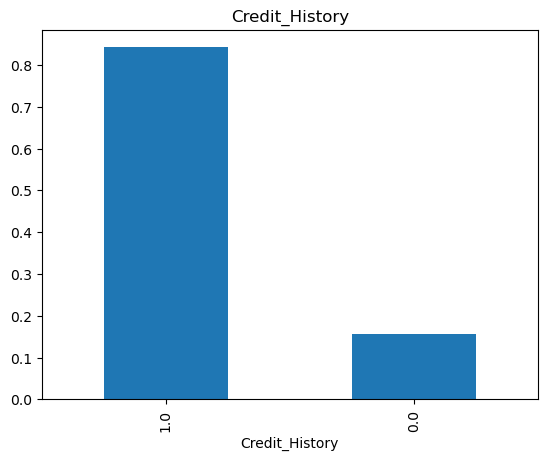

In [215]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


Around 84% applicants have repaid their debts.

In [216]:
train['Dependents'].count()

599

Size of our "Dependents" variable is : 599

In [217]:
train["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

In [218]:
train['Dependents'].value_counts(normalize=True)*100

Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

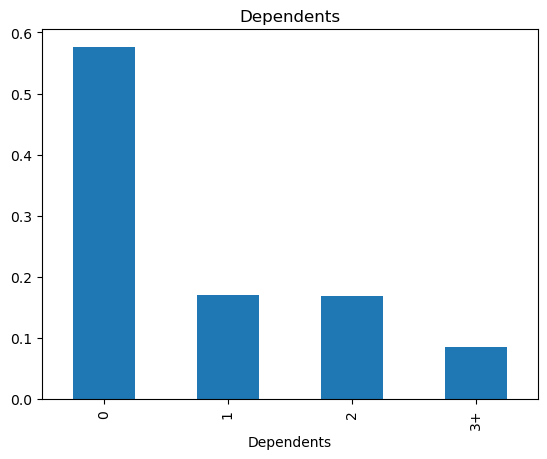

In [219]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

# Analysis on "Education" variable :

In [220]:
train["Education"].count()

614

Size of Education variable : 614

In [221]:
train["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

People who are Graduated : 480

People who are not Graduated : 134

In [222]:
train["Education"].value_counts(normalize=True)*100

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

<Axes: title={'center': 'Education'}, xlabel='Education'>

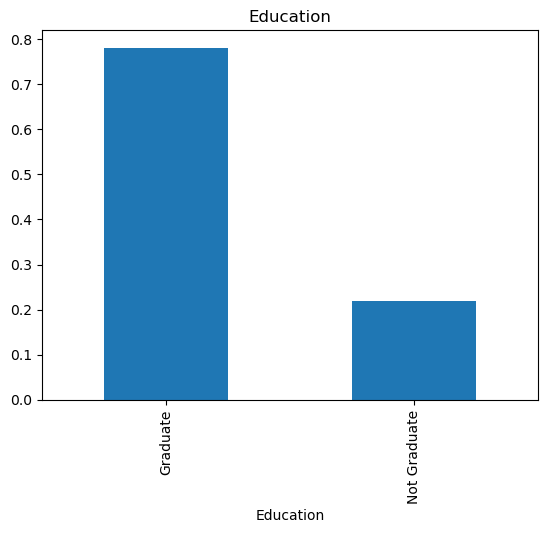

In [223]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")

Total number of People : 614

78% are Graduated and 22% are not Graduated

# Analysis on "Property_Area" variable :

In [224]:
train["Property_Area"].count()

614

Size of "Property_Area" variable : 614

In [225]:
train["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179
    

In [226]:
train["Property_Area"].value_counts(normalize=True)*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

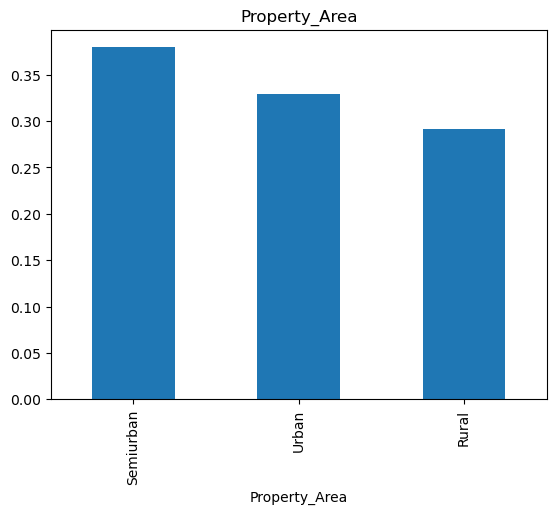

In [227]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

# Independent Variable (Numerical)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

# "ApplicantIncome" distribution :

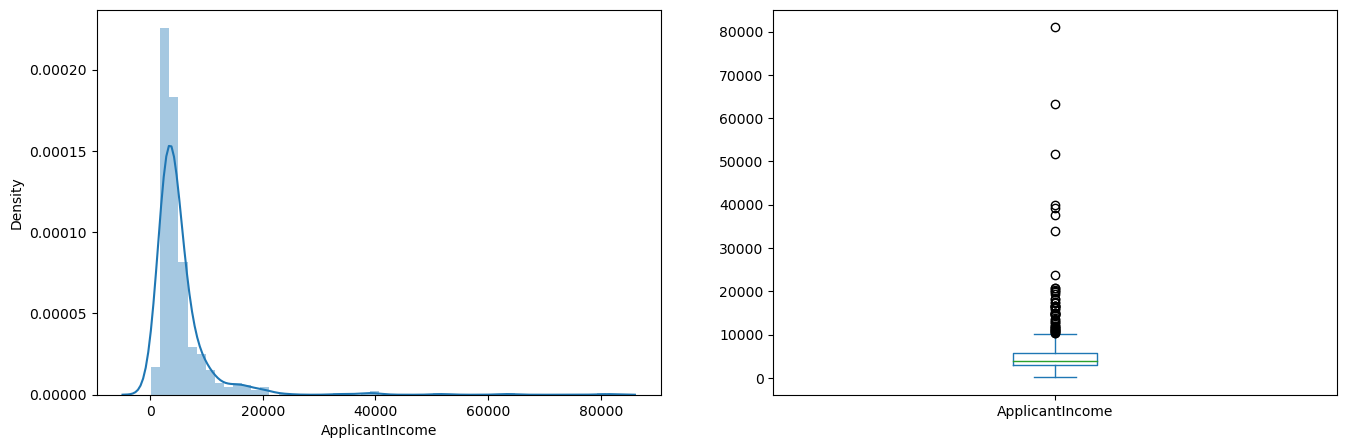

In [228]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

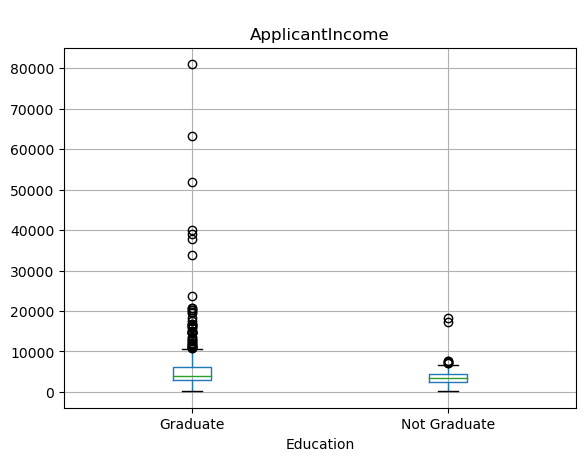

In [229]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# Let’s look at the "CoapplicantIncome" distribution:


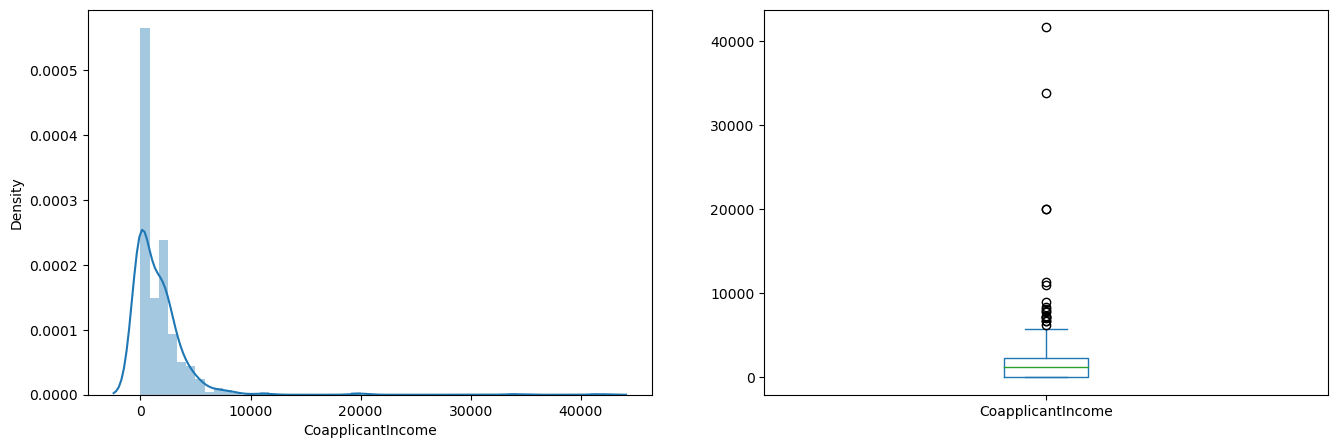

In [230]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

# Let’s look at the distribution of "LoanAmount" variable :

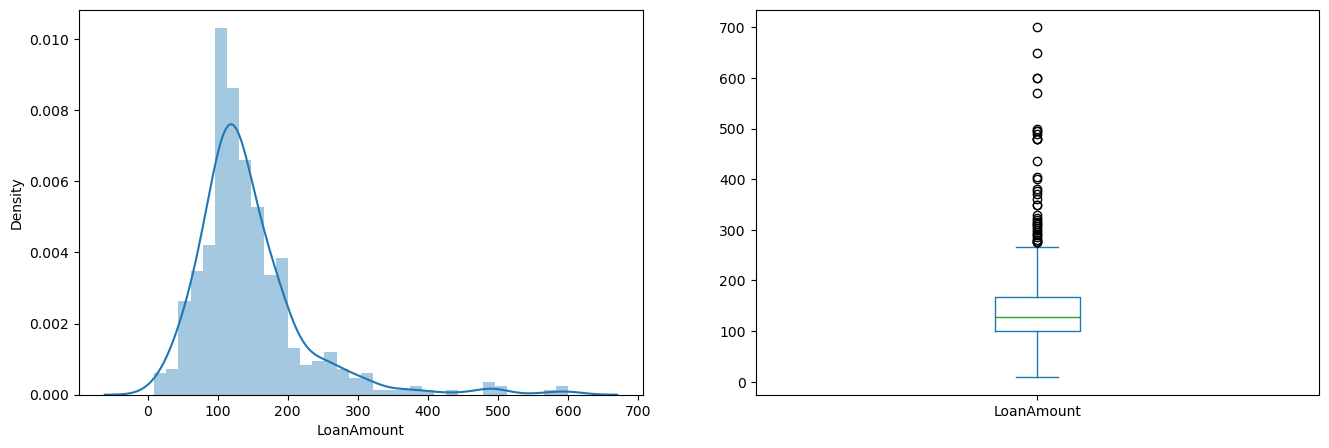

In [231]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# distribution of "LoanAmountTerm" variable :

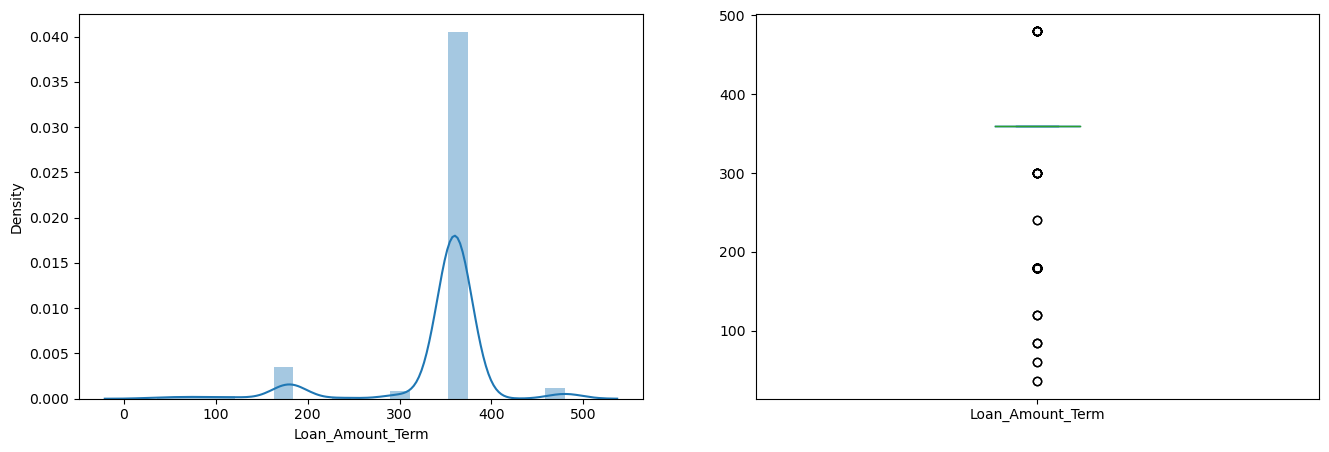

In [232]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

# Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

# Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


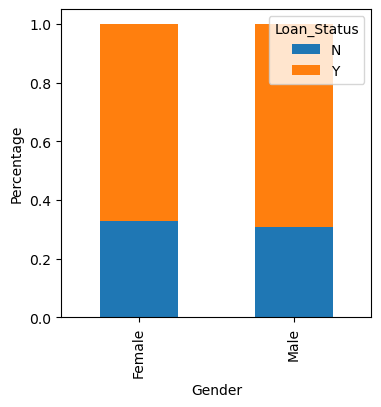

In [233]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 339

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 150

Proportion of Male applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


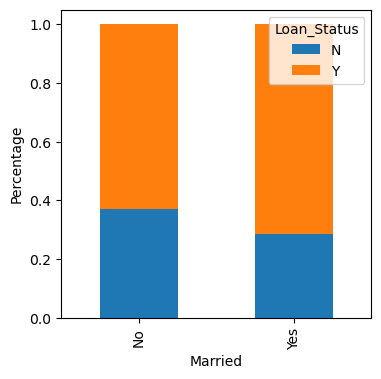

In [234]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 285

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


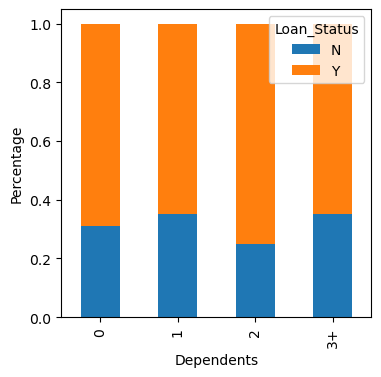

In [235]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0  and Loan was approed : 238

Number of dependents on the loan applicant : 0  and Loan was not approed : 107

Number of dependents on the loan applicant : 1  and Loan was approed : 66

Number of dependents on the loan applicant : 1  and Loan was not approed : 36

Number of dependents on the loan applicant : 2  and Loan was approed : 76

Number of dependents on the loan applicant : 2  and Loan was not approed : 25

Number of dependents on the loan applicant : 3+  and Loan was approed : 33

Number of dependents on the loan applicant : 3+  and Loan was not approed : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

# Relation between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


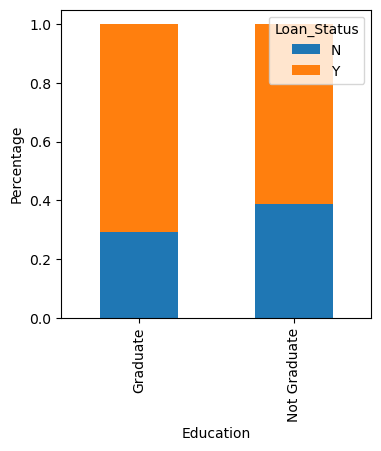

In [236]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Number of people who are Graduate and Loan was approed : 340

Number of people who are Graduate and Loan was no approed : 140

Number of people who are Not Graduate and Loan was approed : 82

Number of people who are Not Graduate and Loan was not approed : 52

Proportion of Graduate applicants is higher for the approved loans.


# Relation between "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


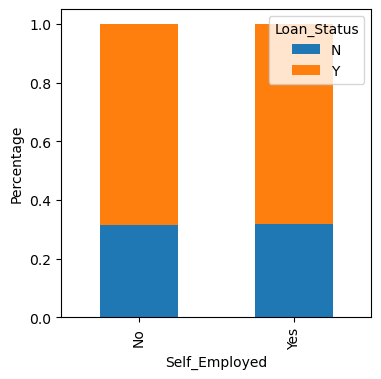

In [237]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

People who are Self_Employed and Loan was approed : 56

People who are Self_Employed and Loan was not approed : 26

People who are not Self_Employed and Loan was approed : 343

People who are not Self_Employed and Loan was not approed : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

# Relation between "Loan_Status" and "Credit_History"

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


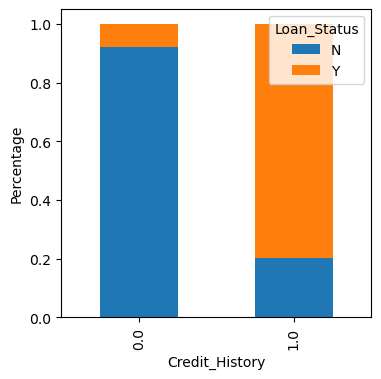

In [238]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

# Relation between "Loan_Status" and "Property_Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


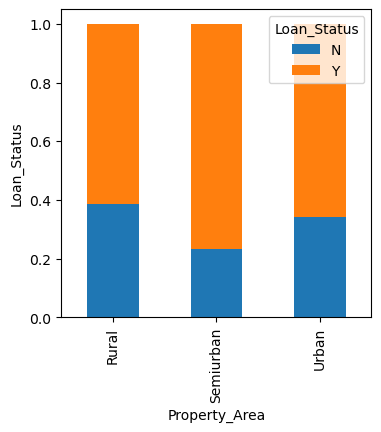

In [239]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical Independent Variable vs Target Variable

# Relation between "Loan_Status" and "Income"

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<Axes: xlabel='Loan_Status'>

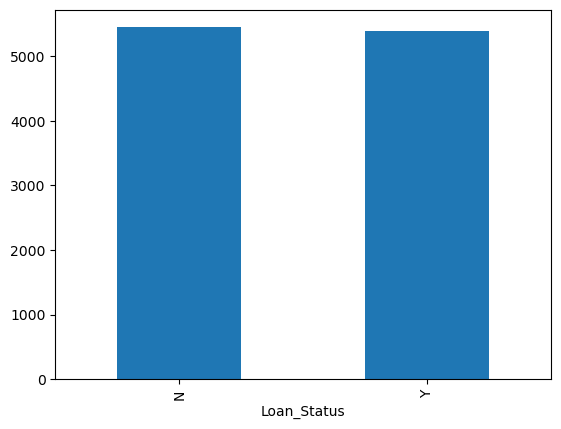

In [240]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income.
So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [241]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


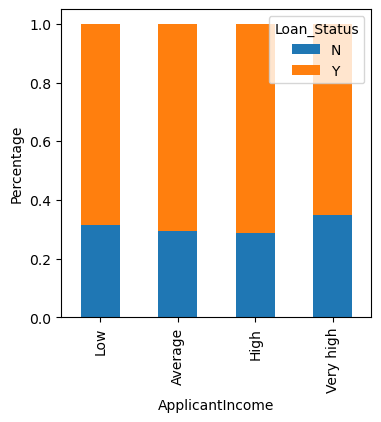

In [242]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar way.

In [243]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


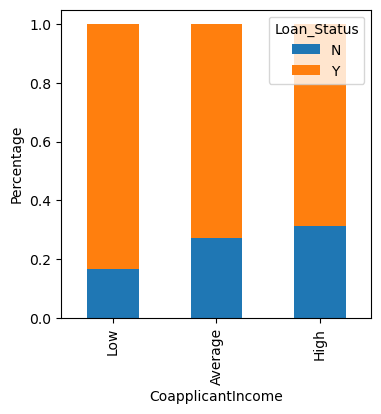

In [244]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [245]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [246]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


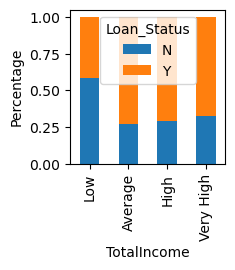

In [247]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

Whose TotalIncome was Low and loan was approved : 10

Whose TotalIncome was Low and loan was not approved : 14

Whose TotalIncome was Aerage and loan was apprvoed : 87

Whose TotalIncome was Average and loan was not approved : 32

Whose TotalIncome was High and loan was approved : 159

Whose TotalIncome was High and loan was not approved : 65

Whose TotalIncome was Very High and loan was approved : 166

Whose TotalIncome was Very High and loan was not approed : 81

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

# Relation between "Loan_Status" and "Loan Amount"

In [248]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


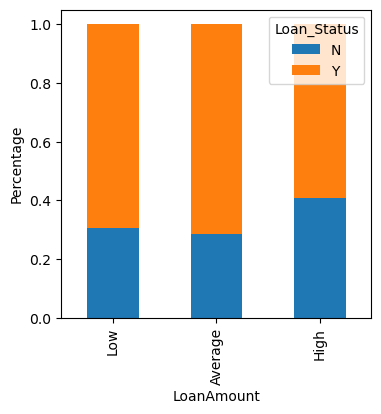

In [249]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Whose Loan Amount was low and Loan was approved : 86

Whose Loan Amount was low and Loan was not approved : 38

Whose Loan Amount was Average and Loan was approved : 207

Whose Loan Amount was Average and Loan was not approved : 83

Whose Loan Amount was High and Loan was approved : 39

Whose Loan Amount was High and Loan was not approved : 27

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [250]:
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [251]:
#train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
#test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring.
The variables with darker color means their correlation is more.

In [252]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

ValueError: could not convert string to float: 'LP001002'

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

# Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

# Missing value imputation

Let’s list out feature-wise count of missing values.

In [ ]:
train.isnull().sum()

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
    
For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

In [ ]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. 
We will look at the value count of the Loan amount term variable.

In [ ]:
train["Loan_Amount_Term"].value_counts()

It can be seen that in loan amount term variable, the value of 360 is repeating the most.
So we will replace the missing values in this variable using the mode of this variable.

In [ ]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [ ]:
train["Loan_Amount_Term"].value_counts()

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [ ]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [ ]:
train.isnull().sum()

As we can see that all the missing values have been filled in the train dataset.

Let’s fill all the missing values in the test dataset too with the same approach

In [ ]:
test.isnull().sum()

In [ ]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [ ]:
test.isnull().sum()

In [ ]:
sns.distplot(train["LoanAmount"]);

In [ ]:
train['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. 

We will do the similar changes to the test file simultaneously.

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [ ]:
sns.distplot(train["LoanAmount_log"])

Let's have a look in test set [LoanAmount]

In [ ]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

In [ ]:
sns.distplot(test["LoanAmount_log"])

In [ ]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

Just have a look of train dataset  "TotalIncome"

In [ ]:
train[["TotalIncome"]].head()

In [ ]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

Just have a look of test dataset "TotalIncome"

In [ ]:
test[["TotalIncome"]].head()

Let’s check the distribution of train dataset Total Income.

In [ ]:
sns.distplot(train["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

In [ ]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Let’s check the distribution of test dataset Total Income.

In [ ]:
sns.distplot(test["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

In [ ]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Now create the EMI feature.

In [ ]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

Have a look of train dataset "EMI"

In [ ]:
train[["EMI"]].head()

Again have a look of test dataset "EMI"

In [ ]:
test[["EMI"]].head()

Let’s check the distribution of EMI variable.

In [ ]:
sns.distplot(train["EMI"])

In [ ]:
sns.distplot(test["EMI"])

Let's create Balance Income feature now and check its distribution.

In [ ]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

Have a look of train dataset "Balance Income"

In [ ]:
train[["Balance_Income"]].head()

Have a look of test dataset "Balance Income"

In [ ]:
test[["Balance_Income"]].head()

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [ ]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
train.head()

In [ ]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
test.head()

Drop "Loan_ID"

In [ ]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

After drop train dataset will look :

In [ ]:
train.head(3)

After drop test dataset will look :

In [ ]:
test.head(3)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

droping the target variable "Loan_Status"

In [ ]:
X=train.drop("Loan_Status",1)

In [ ]:
X.head(2)

save the target variable "Loan_Status" in another dataset

In [ ]:
y=train[["Loan_Status"]]

In [ ]:
y.head(2)

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. 

Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.

As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female),
one for each class, i.e. Male and Female.


Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head(3)

In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
train.head(3)

In [ ]:
test.head(3)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions?
One way of doing this is we can divide our train dataset into two parts:train and validation.
We can train the model on this train part and using that make predictions for the validation part.
In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).



We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model. 

# Logistic Regression

Let's import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)

In [ ]:
logistic_model.fit(x_train,y_train)

Let’s predict the Loan_Status for validation set

In [ ]:
pred_cv_logistic=logistic_model.predict(x_cv)

Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [ ]:
score_logistic

So our predictions are almost 79% accurate, i.e. we have identified 79% of the loan status correctly for our logistic regression model.

Let’s make predictions for the test dataset.

In [ ]:
pred_test_logistic = logistic_model.predict(test)

# Decision Tree



Let's import Decison Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=1)


Fit the model :

In [ ]:
tree_model.fit(x_train,y_train)

In [ ]:
pred_cv_tree=tree_model.predict(x_cv)

In [ ]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

In [ ]:
score_tree

our predictions are almost 71% accurate, i.e. we have identified 71% of the loan status correctly for our Decision tree model.

Let’s make predictions for the test dataset.

In [ ]:
pred_test_tree = tree_model.predict(test)

# Random Forest

i)RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.

ii)For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

iii)Final prediction can be a function of all the predictions made by the individual learners.

Let's import Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [ ]:
forest_model.fit(x_train,y_train)

In [ ]:
pred_cv_forest=forest_model.predict(x_cv)

In [ ]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [ ]:
score_forest

our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our Random Forest model.

Let’s make predictions for the test dataset.

In [ ]:
pred_test_forest=forest_model.predict(test)

In [ ]:
from sklearn.model_selection import GridSearchCV

Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators.

In [ ]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

Fit the grid search model

In [ ]:
grid_search.fit(x_train,y_train)

Find out the optimized value

In [ ]:
grid_search.best_estimator_

The optimized value for the max_depth variable is 3 and for n_estimator is 101,random_state = 1. Now let’s build the model using these optimized values.

In [ ]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=101)

In [ ]:
grid_forest_model.fit(x_train,y_train)

In [ ]:
pred_grid_forest = grid_forest_model.predict(x_cv)

In [ ]:
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100

In [ ]:
score_grid_forest

our predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly for our Random Forest model with grid search.

In [ ]:
pred_grid_forest_test = grid_forest_model.predict(test)

In [ ]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can find out that 'Credit_History','Balance Income' feature are most important. So, feature engineering helped us in predicting our target variable.